## Analysis & Prediction of Survival for Titanic-Crash

In [1]:
# required modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
# loading of a csv file into pandas dataframe
df = pd.read_csv("titanic.csv")

In [3]:
df.head()  # top 5 rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.tail()  # bottom 5 rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


### Preprocessing & Cleansing of data

In [5]:
df.shape

(891, 12)

There are 891 rows & 12 columns

In [6]:
# check for null values & datatype of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# total null-values present per column
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Columns Age, Cabin & Embarked contain null-values.

In [8]:
# deleting the insignificant columns
df.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)

In [9]:
# preview of top 5 rows of modified dataframe
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [10]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
dtype: int64

Column Age contains total 177 null-values. Let's replace those null-values with the mean or median value of Age column.

In [11]:
# replacement of null-values with median value
df['Age'] = df['Age'].fillna(df['Age'].median())

In [12]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   Fare      891 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 34.9+ KB


In [14]:
df.shape

(891, 5)

In [15]:
# checking of duplicate rows
df.duplicated().sum()

128

In [16]:
# dropping the duplicates
df.drop_duplicates(inplace=True)

In [17]:
df.shape

(763, 5)

### Preprocessing with scikit module

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
# transformation of string-based column into numerical_based using LabelEncoder()
le_sex = LabelEncoder()

# 0 ---> female
# 1 ---> male

In [20]:
df['le_sex'] = le_sex.fit_transform(df.Sex)

In [21]:
df.head()

,Survived,Pclass,Sex,Age,Fare,le_sex
0,0,3,male,22.0,7.2500,1
1,1,1,female,38.0,71.2833,0
2,1,3,female,26.0,7.9250,0
3,1,1,female,35.0,53.1000,0
4,0,3,male,35.0,8.0500,1


In [22]:
df.tail()

,Survived,Pclass,Sex,Age,Fare,le_sex
885,0,3,female,39.0,29.125,0
887,1,1,female,19.0,30.000,0
888,0,3,female,28.0,23.450,0
889,1,1,male,26.0,30.000,1
890,0,3,male,32.0,7.750,1


In [23]:
# dropping-off the string-based column
df.drop(['Sex'], axis=1, inplace=True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 763 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  763 non-null    int64  
 1   Pclass    763 non-null    int64  
 2   Age       763 non-null    float64
 3   Fare      763 non-null    float64
 4   le_sex    763 non-null    int32  
dtypes: float64(2), int32(1), int64(2)
memory usage: 32.8 KB


### Correlation-check

In [25]:
df.corr()

,Survived,Pclass,Age,Fare,le_sex
Survived,1.000000,-0.331388,-0.076381,0.247842,-0.512130
Pclass,-0.331388,1.000000,-0.343539,-0.553488,0.119120
Age,-0.076381,-0.343539,1.000000,0.092821,0.091579
Fare,0.247842,-0.553488,0.092821,1.000000,-0.170817
le_sex,-0.512130,0.119120,0.091579,-0.170817,1.000000


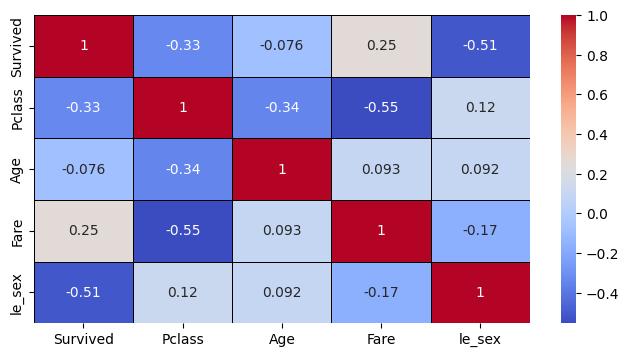

In [26]:
plt.figure(figsize=(8,4))
sns.heatmap(df.corr(),yticklabels=True,cbar=True,cmap='coolwarm',annot=True, linewidths=0.5, linecolor='black')
plt.show()

In [27]:
X = df.drop(['Survived'], axis=1)
X.head()

,Pclass,Age,Fare,le_sex
0,3,22.0,7.2500,1
1,1,38.0,71.2833,0
2,3,26.0,7.9250,0
3,1,35.0,53.1000,0
4,3,35.0,8.0500,1


In [28]:
Y = df['Survived']
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [31]:
len(X_train), len(X_test)

(610, 153)

## Decision Tree Model

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
model = DecisionTreeClassifier()

In [34]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [35]:
y_predict = model.predict(X_test)

In [36]:
from sklearn import metrics

In [37]:
model.score(X_train, y_train)

0.9754098360655737

In [38]:
model.score(X_test, y_test)

0.7581699346405228

In [39]:
metrics.accuracy_score(y_test, y_predict)

0.7581699346405228

In [40]:
metrics.recall_score(y_test, y_predict)

0.7719298245614035

In [41]:
metrics.precision_score(y_test, y_predict)

0.6470588235294118

In [42]:
metrics.f1_score(y_test, y_predict)

0.704

In [43]:
metrics.mean_squared_error(y_test, y_predict)

0.24183006535947713

In [44]:
decision_tree_model_score = pd.DataFrame({
    'Training Score': round(model.score(X_train, y_train), 3),
    'Testing Score': round(model.score(X_test, y_test), 3),
    'Accuracy': round(metrics.accuracy_score(y_test, y_predict), 3),
    'Precision': round(metrics.precision_score(y_test, y_predict), 3),
    'Recall': round(metrics.recall_score(y_test, y_predict), 3),
    'F1-Score': round(metrics.f1_score(y_test, y_predict), 3),
    'MSE Score': round(metrics.mean_squared_error(y_test, y_predict), 3)},
     index = ['Decision Tree Forest'])
decision_tree_model_score

,Training Score,Testing Score,Accuracy,Precision,Recall,F1-Score,MSE Score
Decision Tree Forest,0.975,0.758,0.758,0.647,0.772,0.704,0.242


In [45]:
cm = metrics.confusion_matrix(y_test, y_predict)
cm

array([[72, 24],
       [13, 44]], dtype=int64)

Text(0.5, 1.0, 'Decision Tree Confusion Matrix')

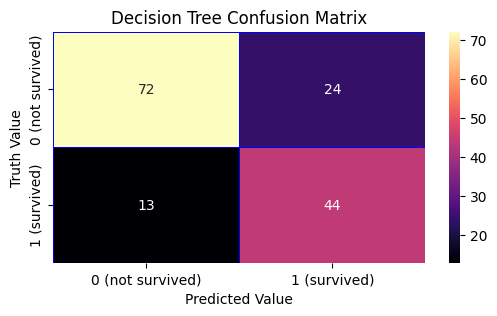

In [46]:
plt.figure(figsize=(6,3))

sns.heatmap(cm, annot=True, cmap='magma', linewidths=0.5, linecolor='blue',
           xticklabels=['0 (not survived)', '1 (survived)'],
           yticklabels=['0 (not survived)', '1 (survived)'])

plt.xlabel('Predicted Value')
plt.ylabel('Truth Value')
plt.title('Decision Tree Confusion Matrix')

## Logistic Regression Model

In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
model = LogisticRegression()

In [49]:
len(X_train), len(X_test)

(610, 153)

In [50]:
model.fit(X_train, y_train)

LogisticRegression()

In [51]:
y_predict = model.predict(X_test)

In [52]:
model.score(X_train, y_train)

0.7672131147540984

In [53]:
model.score(X_test, y_test)

0.7450980392156863

In [54]:
metrics.accuracy_score(y_test, y_predict)

0.7450980392156863

In [55]:
metrics.precision_score(y_test, y_predict)

0.6363636363636364

In [56]:
metrics.recall_score(y_test, y_predict)

0.7368421052631579

In [57]:
metrics.f1_score(y_test, y_predict)

0.6829268292682926

In [58]:
metrics.mean_squared_error(y_test, y_predict)

0.2549019607843137

In [59]:
logistic_regression_model_score = pd.DataFrame({
    'Training Score': round(model.score(X_train, y_train), 3),
    'Testing Score': round(model.score(X_test, y_test), 3),
    'Accuracy': round(metrics.accuracy_score(y_test, y_predict), 3),
    'Precision': round(metrics.precision_score(y_test, y_predict), 3),
    'Recall': round(metrics.recall_score(y_test, y_predict), 3),
    'F1-Score': round(metrics.f1_score(y_test, y_predict), 3),
    'MSE Score': round(metrics.mean_squared_error(y_test, y_predict), 3)},
     index = ['Logistic Regression Model'])
logistic_regression_model_score

,Training Score,Testing Score,Accuracy,Precision,Recall,F1-Score,MSE Score
Logistic Regression Model,0.767,0.745,0.745,0.636,0.737,0.683,0.255


In [60]:
cm = metrics.confusion_matrix(y_test, y_predict)
cm

array([[72, 24],
       [15, 42]], dtype=int64)

Text(0.5, 1.0, 'Logistic Regression Confusion Matrix')

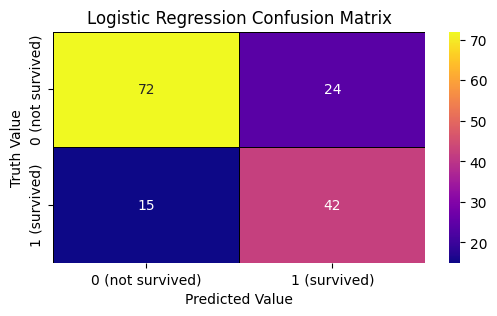

In [61]:
plt.figure(figsize=(6,3))

sns.heatmap(cm, annot=True, cmap='plasma', linewidths=0.5, linecolor='black',
           xticklabels=['0 (not survived)', '1 (survived)'],
           yticklabels=['0 (not survived)', '1 (survived)'])

plt.xlabel('Predicted Value')
plt.ylabel('Truth Value')
plt.title('Logistic Regression Confusion Matrix')

## Support Vector Machine Model

In [62]:
from sklearn.svm import SVC

In [63]:
model = SVC(C=20)

In [64]:
len(X_train), len(X_test)

(610, 153)

In [65]:
model.fit(X_train, y_train)

SVC(C=20)

In [66]:
y_predict = model.predict(X_test)

In [67]:
model.score(X_train, y_train)

0.7049180327868853

In [68]:
model.score(X_test, y_test)

0.7320261437908496

In [69]:
metrics.accuracy_score(y_test, y_predict)

0.7320261437908496

In [70]:
metrics.precision_score(y_test, y_predict)

0.7222222222222222

In [71]:
metrics.recall_score(y_test, y_predict)

0.45614035087719296

In [72]:
metrics.f1_score(y_test, y_predict)

0.5591397849462365

In [73]:
metrics.mean_squared_error(y_test, y_predict)

0.2679738562091503

In [74]:
SVM_model_score = pd.DataFrame({
    'Training Score': round(model.score(X_train, y_train), 3),
    'Testing Score': round(model.score(X_test, y_test), 3),
    'Accuracy': round(metrics.accuracy_score(y_test, y_predict), 3),
    'Precision': round(metrics.precision_score(y_test, y_predict), 3),
    'Recall': round(metrics.recall_score(y_test, y_predict), 3),
    'F1-Score': round(metrics.f1_score(y_test, y_predict), 3),
    'MSE Score': round(metrics.mean_squared_error(y_test, y_predict), 3)},
     index = ['Support Vector Machine Model'])
SVM_model_score

,Training Score,Testing Score,Accuracy,Precision,Recall,F1-Score,MSE Score
Support Vector Machine Model,0.705,0.732,0.732,0.722,0.456,0.559,0.268


In [75]:
cm = metrics.confusion_matrix(y_test, y_predict)
cm

array([[86, 10],
       [31, 26]], dtype=int64)

Text(0.5, 1.0, 'SVM Confusion Matrix')

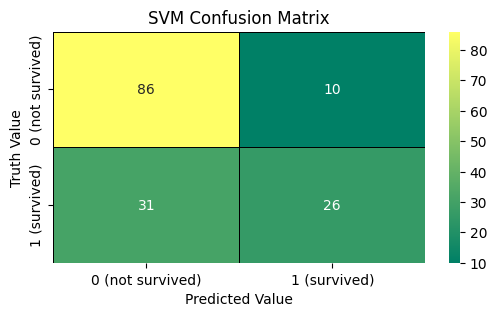

In [76]:
plt.figure(figsize=(6,3))

sns.heatmap(cm, annot=True, cmap='summer', linewidths=0.5, linecolor='black',
           xticklabels=['0 (not survived)', '1 (survived)'],
           yticklabels=['0 (not survived)', '1 (survived)'])

plt.xlabel('Predicted Value')
plt.ylabel('Truth Value')
plt.title('SVM Confusion Matrix')

## Random Forest Model

In [77]:
from sklearn.ensemble import RandomForestClassifier

In [78]:
model = RandomForestClassifier(n_estimators=100)

In [79]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [80]:
y_predict = model.predict(X_test)

In [81]:
model.score(X_train, y_train)

0.9754098360655737

In [82]:
model.score(X_test, y_test)

0.7908496732026143

In [83]:
metrics.accuracy_score(y_test, y_predict)

0.7908496732026143

In [84]:
metrics.precision_score(y_test, y_predict)

0.6984126984126984

In [85]:
metrics.recall_score(y_test, y_predict)

0.7719298245614035

In [86]:
metrics.f1_score(y_test, y_predict)

0.7333333333333333

In [87]:
metrics.mean_squared_error(y_test, y_predict)

0.20915032679738563

In [88]:
random_forest_model_score = pd.DataFrame({
    'Training Score': round(model.score(X_train, y_train), 3),
    'Testing Score': round(model.score(X_test, y_test), 3),
    'Accuracy': round(metrics.accuracy_score(y_test, y_predict), 3),
    'Precision': round(metrics.precision_score(y_test, y_predict), 3),
    'Recall': round(metrics.recall_score(y_test, y_predict), 3),
    'F1-Score': round(metrics.f1_score(y_test, y_predict), 3),
    'MSE Score': round(metrics.mean_squared_error(y_test, y_predict), 3)},
     index = ['Random Forest Model'])
random_forest_model_score

,Training Score,Testing Score,Accuracy,Precision,Recall,F1-Score,MSE Score
Random Forest Model,0.975,0.791,0.791,0.698,0.772,0.733,0.209


In [89]:
cm = metrics.confusion_matrix(y_test, y_predict)
cm

array([[77, 19],
       [13, 44]], dtype=int64)

Text(0.5, 1.0, 'Random Forest Confusion Matrix')

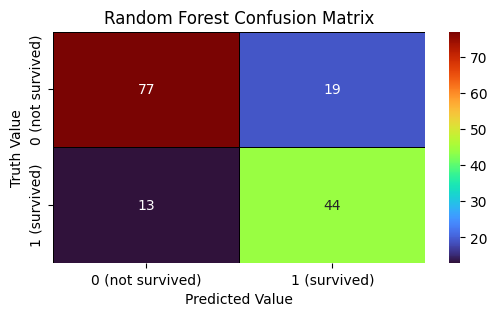

In [90]:
plt.figure(figsize=(6,3))

sns.heatmap(cm, annot=True, cmap='turbo', linewidths=0.5, linecolor='black',
           xticklabels=['0 (not survived)', '1 (survived)'],
           yticklabels=['0 (not survived)', '1 (survived)'])

plt.xlabel('Predicted Value')
plt.ylabel('Truth Value')
plt.title('Random Forest Confusion Matrix')

## Comparision of the above Models

In [91]:
final_score_report = pd.DataFrame()

In [92]:
final_score_report = pd.concat([decision_tree_model_score, logistic_regression_model_score, 
                   SVM_model_score, random_forest_model_score],
                   axis=0)

final_score_report

,Training Score,Testing Score,Accuracy,Precision,Recall,F1-Score,MSE Score
Decision Tree Forest,0.975,0.758,0.758,0.647,0.772,0.704,0.242
Logistic Regression Model,0.767,0.745,0.745,0.636,0.737,0.683,0.255
Support Vector Machine Model,0.705,0.732,0.732,0.722,0.456,0.559,0.268
Random Forest Model,0.975,0.791,0.791,0.698,0.772,0.733,0.209
